# NASA Near Earth Objects - Predicting Hazard of Asteroids
### Filip Schauer & Axel Csomány

Using the datasource "Near Earth Objects" provided by NASA, our project aims to predict the possibly hazardous nature of asteroids and other objects.

First Step: Import necesarry modules and tools.

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

Next Step: Read given .csv-File and drop unnecessary columns.

In [72]:
df = pd.read_csv('input.csv')

In [73]:
df = df.drop(columns=['id', 'name', 'orbiting_body', 'sentry_object'])

In [74]:
X = df.drop(columns=['hazardous'])
y = df['hazardous']

Visualizing the Data

<Figure size 1400x800 with 0 Axes>

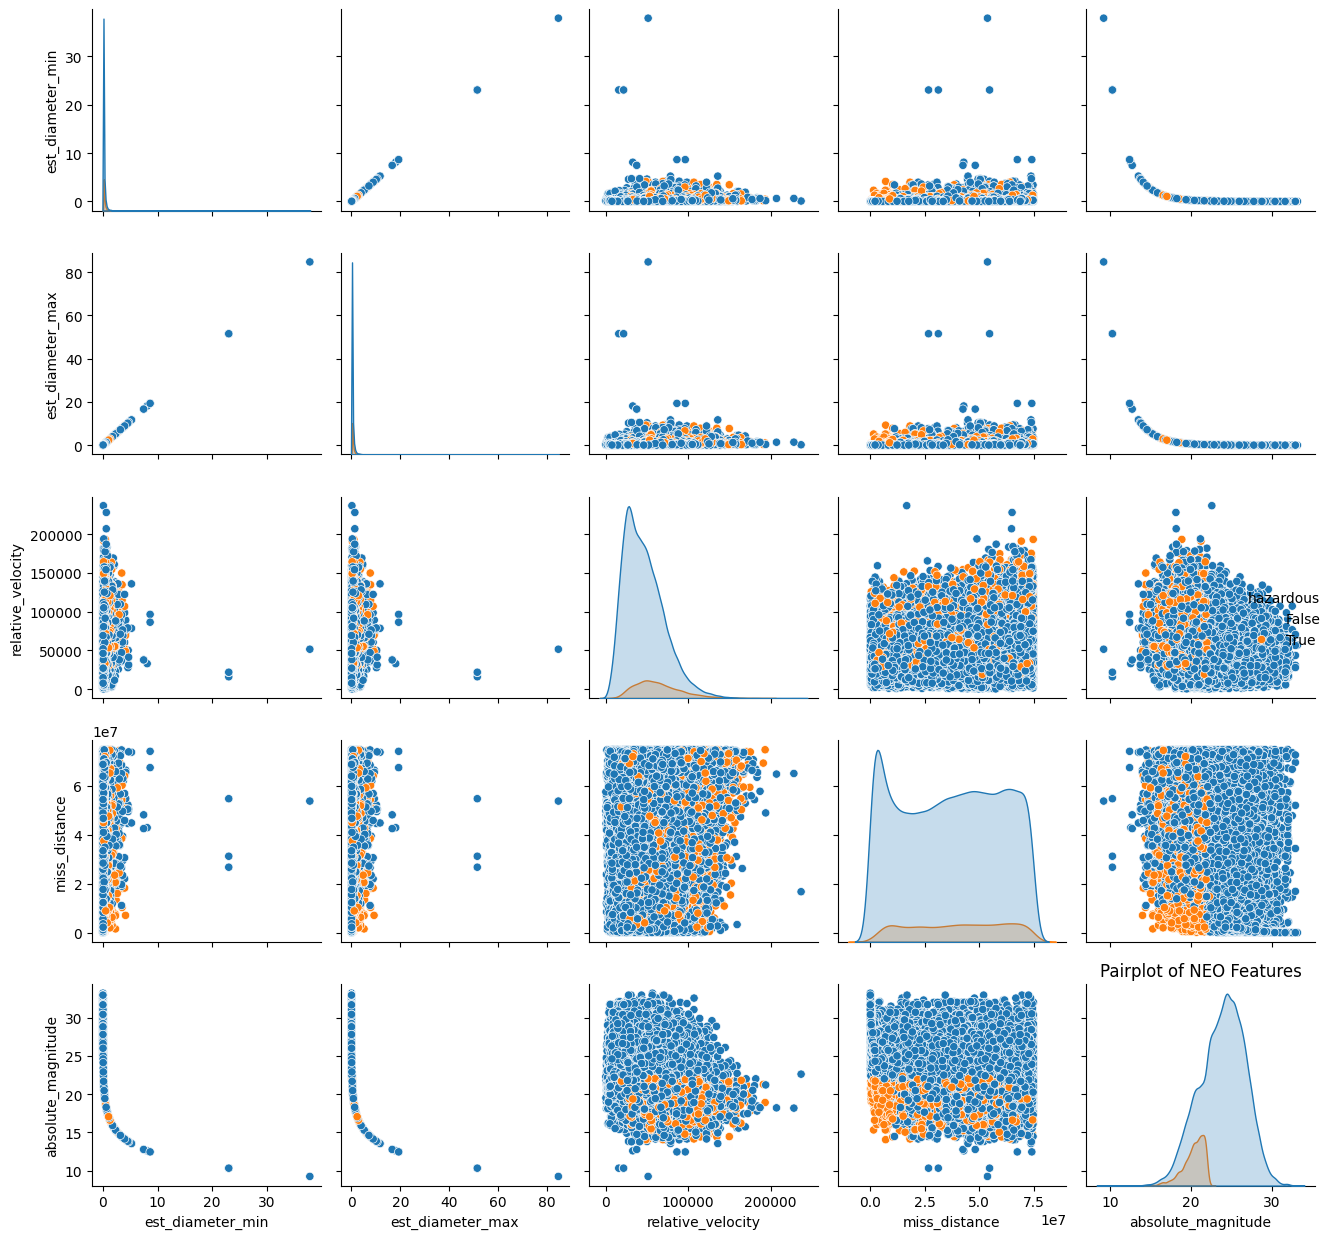

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 8))

sns.pairplot(df, hue='hazardous', diag_kind='kde')
plt.title('Pairplot of NEO Features')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))

# Scatter plot for diameter vs. velocity
sns.scatterplot(x='est_diameter_min', y='relative_velocity', hue='hazardous', data=df)
plt.title('Diameter vs. Relative Velocity')
plt.xlabel('Estimated Diameter Min (km)')
plt.ylabel('Relative Velocity (km/h)')

In [ ]:
plt.figure(figsize=(14, 8))

# Histogram for miss distance
sns.histplot(df['miss_distance'], bins=10, kde=True)
plt.title('Distribution of Miss Distance')
plt.xlabel('Miss Distance (AU)')
plt.ylabel('Frequency')

In [ ]:
plt.figure(figsize=(14, 8))


Next Step: Create train-test split.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Our first attempt at a solution would be an approach with a "Decision Tree".

Next Step: Create Decision Tree Classifier and prediction.

In [76]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_pred = clf.predict(X_test)

Evaluation of the accuracy and F1 score.

In [78]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.892998678996037

In [79]:
f1 = f1_score(y_test, y_pred)
f1

np.float64(0.45879732739420936)

Hm... doesn't look too good. 

Next Step: Let's compare with a dummy model.

In [80]:
from sklearn.dummy import DummyClassifier

In [81]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [82]:
accuracy_score(y_test, dummy.predict(X_test))

0.9048326728313518

In [83]:
f1_score(y_test, dummy.predict(X_test))

np.float64(0.0)

The dummy seems to do better than our model... Let's try using KNN. We'll have to scale our inputs for this.

Next Step: Scale data, create KNeighborsClassifier and evaluate accuracy score.

In [84]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
accuracy_score(y_test, knn.predict(X_test))

0.9013099955966535

In [87]:
f1_score(y_test, knn.predict(X_test))

np.float64(0.3697715289982425)

Not sure how many neighbors to use here, but since a higher count seems to be better, let's try to loop through:

In [88]:
highest_accuracy = 0
highest_accuracy_neighbors = 0
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        highest_accuracy_neighbors = i
        print(f"New highest accuracy: {highest_accuracy} with {highest_accuracy_neighbors} neighbors")
highest_accuracy, highest_accuracy_neighbors

New highest accuracy: 0.8902465874064289 with 1 neighbors
New highest accuracy: 0.9068141787758697 with 2 neighbors
New highest accuracy: 0.9079700572435051 with 4 neighbors
New highest accuracy: 0.908630559225011 with 6 neighbors
New highest accuracy: 0.908960810215764 with 8 neighbors
New highest accuracy: 0.9107221488331132 with 10 neighbors
New highest accuracy: 0.9111074416556583 with 12 neighbors
New highest accuracy: 0.912373403786878 with 14 neighbors
New highest accuracy: 0.9129788639365918 with 20 neighbors
New highest accuracy: 0.9131439894319683 with 24 neighbors
New highest accuracy: 0.9131990312637605 with 36 neighbors
New highest accuracy: 0.9134742404227213 with 48 neighbors
New highest accuracy: 0.9135292822545135 with 67 neighbors


(0.9135292822545135, 67)

It seems like the highest we got here was 67. Let's try the same evaluation out with f1_score to see if there's any difference:

In [89]:
highest_f1 = 0
highest_f1_neighbors = 0
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    f1 = f1_score(y_test, knn.predict(X_test))
    print(f"F1 score for {i} neighbors: {f1}")
    if f1 > highest_f1:
        highest_f1 = f1
        highest_f1_neighbors = i
        print(f"New highest F1 score: {highest_f1} with {highest_f1_neighbors} neighbors")
highest_f1, highest_f1_neighbors

F1 score for 1 neighbors: 0.4312606959498003
New highest F1 score: 0.4312606959498003 with 1 neighbors
F1 score for 2 neighbors: 0.30243098475484137
F1 score for 3 neighbors: 0.4030612244897959
F1 score for 4 neighbors: 0.3107996702390767
F1 score for 5 neighbors: 0.3697715289982425
F1 score for 6 neighbors: 0.30833333333333335
F1 score for 7 neighbors: 0.3540280857354028
F1 score for 8 neighbors: 0.29855810008481765
F1 score for 9 neighbors: 0.338996138996139
F1 score for 10 neighbors: 0.301464254952627
F1 score for 11 neighbors: 0.3322658126501201
F1 score for 12 neighbors: 0.2907334211682038
F1 score for 13 neighbors: 0.315702479338843
F1 score for 14 neighbors: 0.28991971454058874
F1 score for 15 neighbors: 0.3109987357774968
F1 score for 16 neighbors: 0.2830357142857143
F1 score for 17 neighbors: 0.30373230373230375
F1 score for 18 neighbors: 0.2744207178555202
F1 score for 19 neighbors: 0.29183049366535607


(np.float64(0.4312606959498003), 1)

It seems like our initial approach for the f1_score, with the decision trees seemed to have been better. 

Next Step: Let's visualize the decision tree. 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.20556962025316455)

[Text(0.5, 0.8333333333333334, 'est_diameter_max <= 0.231\ngini = 0.177\nsamples = 72668\nvalue = [65557, 7111]\nclass = Not Hazardous'),
 Text(0.25, 0.5, 'est_diameter_max <= 0.22\ngini = 0.002\nsamples = 49256\nvalue = [49206.0, 50.0]\nclass = Not Hazardous'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 48462\nvalue = [48451, 11]\nclass = Not Hazardous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.093\nsamples = 794\nvalue = [755, 39]\nclass = Not Hazardous'),
 Text(0.75, 0.5, 'miss_distance <= 11367825.5\ngini = 0.421\nsamples = 23412\nvalue = [16351, 7061]\nclass = Not Hazardous'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.264\nsamples = 1063\nvalue = [166, 897]\nclass = Hazardous'),
 Text(0.875, 0.16666666666666666, 'gini = 0.399\nsamples = 22349\nvalue = [16185, 6164]\nclass = Not Hazardous')]

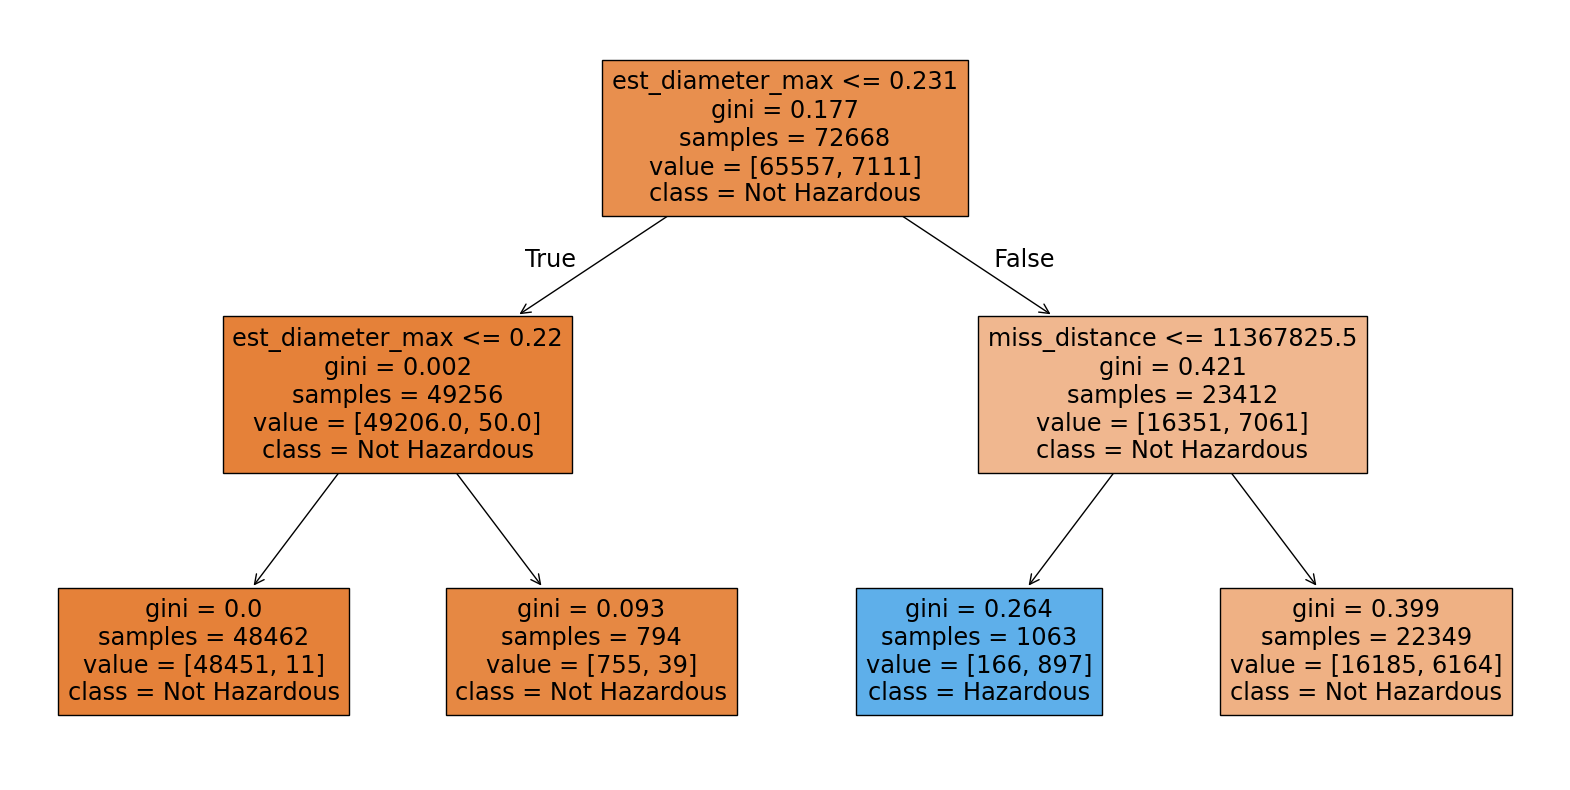

In [91]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Hazardous', 'Hazardous'])

Without limiting the max depth, it would take too long to compute.

In [92]:
clf.get_depth()

2

Let's try limiting the depth of our model.

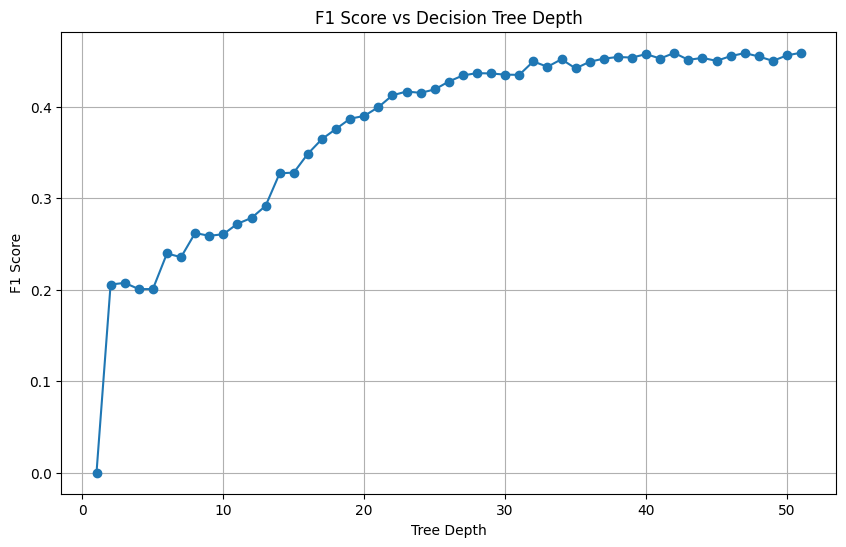

In [93]:
import matplotlib.pyplot as plt

f1_scores = []
depths = range(1, 52)

for depth in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(depths, f1_scores, marker='o')
plt.title('F1 Score vs Decision Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


While a higher max depth does seem to do generally better, even just a depth of two seems to be half useful and it only reaches 0.4 after a max_depth of >20 which is hard to visualize.

In [94]:
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Text(0.5, 0.8333333333333334, 'est_diameter_max <= 0.231\ngini = 0.177\nsamples = 72668\nvalue = [65557, 7111]\nclass = Not Hazardous'),
 Text(0.25, 0.5, 'est_diameter_max <= 0.22\ngini = 0.002\nsamples = 49256\nvalue = [49206.0, 50.0]\nclass = Not Hazardous'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 48462\nvalue = [48451, 11]\nclass = Not Hazardous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.093\nsamples = 794\nvalue = [755, 39]\nclass = Not Hazardous'),
 Text(0.75, 0.5, 'miss_distance <= 11367825.5\ngini = 0.421\nsamples = 23412\nvalue = [16351, 7061]\nclass = Not Hazardous'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.264\nsamples = 1063\nvalue = [166, 897]\nclass = Hazardous'),
 Text(0.875, 0.16666666666666666, 'gini = 0.399\nsamples = 22349\nvalue = [16185, 6164]\nclass = Not Hazardous')]

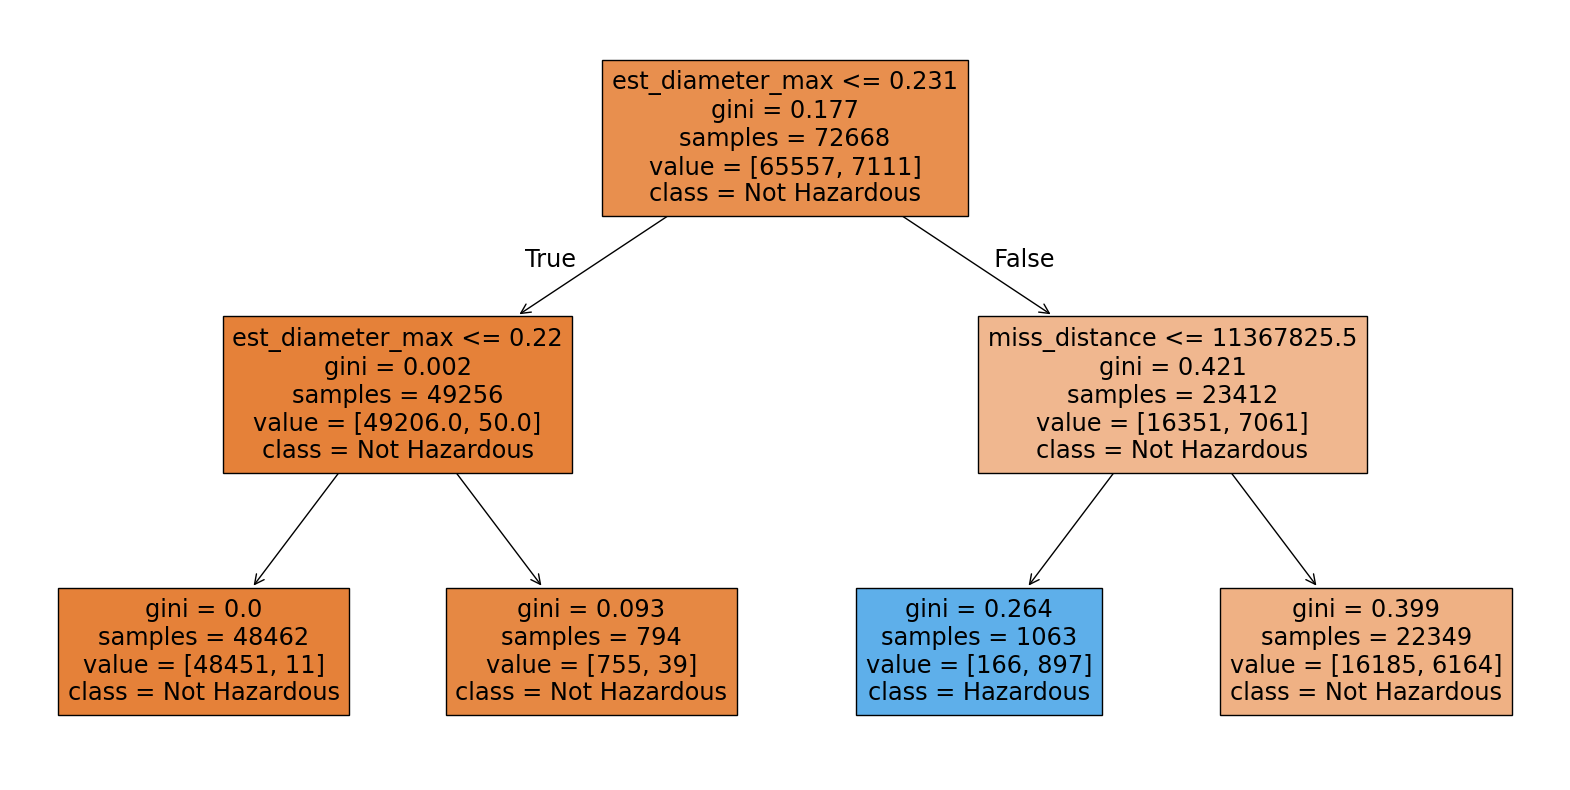

In [95]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Hazardous', 'Hazardous'])

Here it seems like the model decided that an object is dangerous if the maximum diameter is greater than around 230m and the miss distance is less than ~11.3 million km. 

However, since we may want to over-estimate the dangerousness of an object, it may be more useful to use **recall** for evaluation rather than the f1_score, so let's try that. 

Next Step: Let's first see how our dummy model does.

In [96]:
from sklearn.metrics import recall_score

dummy = DummyClassifier(strategy='uniform', random_state=42) # uniform seems to work best here
dummy.fit(X_train, y_train)

recall_score(y_test, dummy.predict(X_test))

np.float64(0.4783111625216888)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

highest_recall = 0
highest_recall_neighbors = 0
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    recall = recall_score(y_test, knn.predict(X_test))
    print(f"Recall for {i} neighbors: {recall}")
    if recall > highest_recall:
        highest_recall = recall
        highest_recall_neighbors = i
        print(f"New highest Recall: {highest_recall} with {highest_recall_neighbors} neighbors")
highest_recall, highest_recall_neighbors

Recall for 1 neighbors: 0.43724696356275305
New highest Recall: 0.43724696356275305 with 1 neighbors
Recall for 2 neighbors: 0.21226142278773857
Recall for 3 neighbors: 0.3655292076344708
Recall for 4 neighbors: 0.21804511278195488
Recall for 5 neighbors: 0.3042220936957779
Recall for 6 neighbors: 0.21399652978600348
Recall for 7 neighbors: 0.27703875072296125
Recall for 8 neighbors: 0.20358588779641412
Recall for 9 neighbors: 0.253903990746096
Recall for 10 neighbors: 0.20242914979757085
Recall for 11 neighbors: 0.24002313475997686
Recall for 12 neighbors: 0.19144013880855987
Recall for 13 neighbors: 0.22093695777906305
Recall for 14 neighbors: 0.18796992481203006
Recall for 15 neighbors: 0.21341816078658185
Recall for 16 neighbors: 0.18334297281665704
Recall for 17 neighbors: 0.20474262579525737
Recall for 18 neighbors: 0.17466743782533256
Recall for 19 neighbors: 0.19317524580682474


(np.float64(0.43724696356275305), 1)

Doesn't seem very good. Let's try decision trees. 

c:\Users\filip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


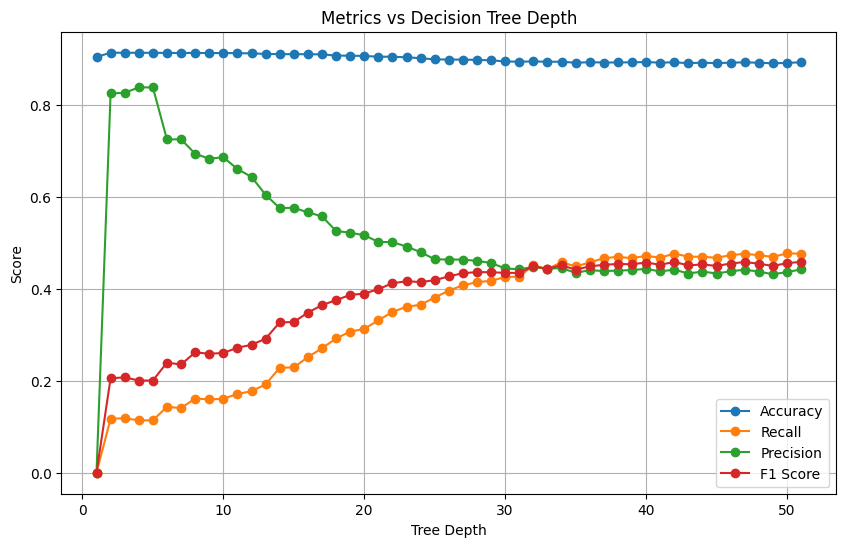

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracies = []
recalls = []
precisions = []
f1_scores = []
depths = range(1, 52)

for depth in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, label='Accuracy', marker='o')
plt.plot(depths, recalls, label='Recall', marker='o')
plt.plot(depths, precisions, label='Precision', marker='o')
plt.plot(depths, f1_scores, label='F1 Score', marker='o')
plt.title('Metrics vs Decision Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

Examining the following graph, we can see a few things:

- Accuracy remains constant at ~0.9
- Precision starts at a high value, but gradually nears a score of ~0.45
- Recall gradually rises and nears the same score.
- Since the F1-Score depends on Recall and Precision, it also stagnates at the same score.

We asked ChatGPT whether or not there are any improvements we could make to our results, and apart of Random Forests (which did not seem to increase the final evaluation whatsoever), it suggested **SMOTE**, which basically adds new data to make the hazardous/not hazardous data an even 50/50 split, instead of a 10/90 split.

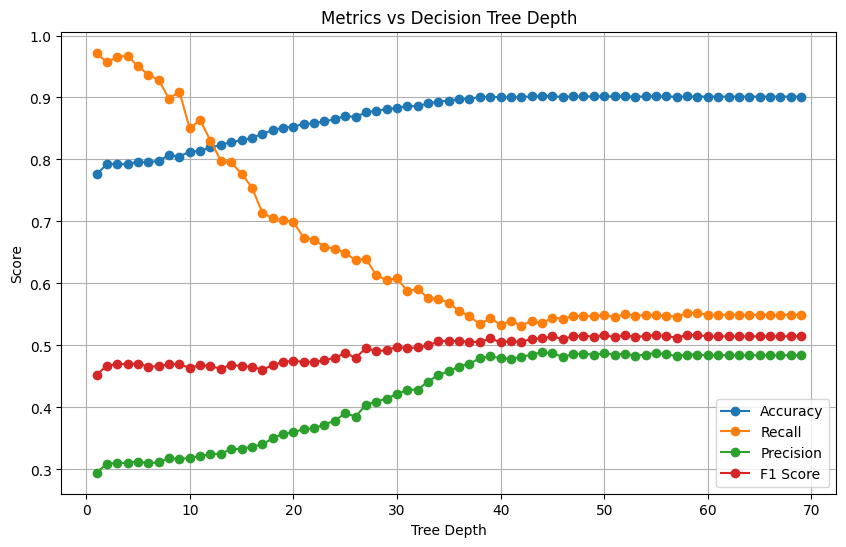

In [99]:
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# Handle class imbalance on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
recalls = []
precisions = []
f1_scores = []
depths = range(1, 70)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, label='Accuracy', marker='o')
plt.plot(depths, recalls, label='Recall', marker='o')
plt.plot(depths, precisions, label='Precision', marker='o')
plt.plot(depths, f1_scores, label='F1 Score', marker='o')
plt.title('Metrics vs Decision Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

Comparing this to our original test data (still split 10/90), we still see that with this method we get better results.

Now we can see the recall score starting high, and gradually falling and stagnating with the precision score, and in turn the F1 score.
The accuracy score only sees a small increase before stagnating.

[Text(0.5, 0.8333333333333334, 'est_diameter_max <= 0.237\ngini = 0.5\nsamples = 131114\nvalue = [65557, 65557]\nclass = Not Hazardous'),
 Text(0.25, 0.5, 'est_diameter_max <= 0.227\ngini = 0.012\nsamples = 49983\nvalue = [49673, 310]\nclass = Not Hazardous'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.004\nsamples = 49229\nvalue = [49138, 91]\nclass = Not Hazardous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.412\nsamples = 754\nvalue = [535, 219]\nclass = Not Hazardous'),
 Text(0.75, 0.5, 'relative_velocity <= 21301.85\ngini = 0.315\nsamples = 81131\nvalue = [15884, 65247]\nclass = Hazardous'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.415\nsamples = 1914\nvalue = [1352, 562]\nclass = Not Hazardous'),
 Text(0.875, 0.16666666666666666, 'gini = 0.3\nsamples = 79217\nvalue = [14532, 64685]\nclass = Hazardous')]

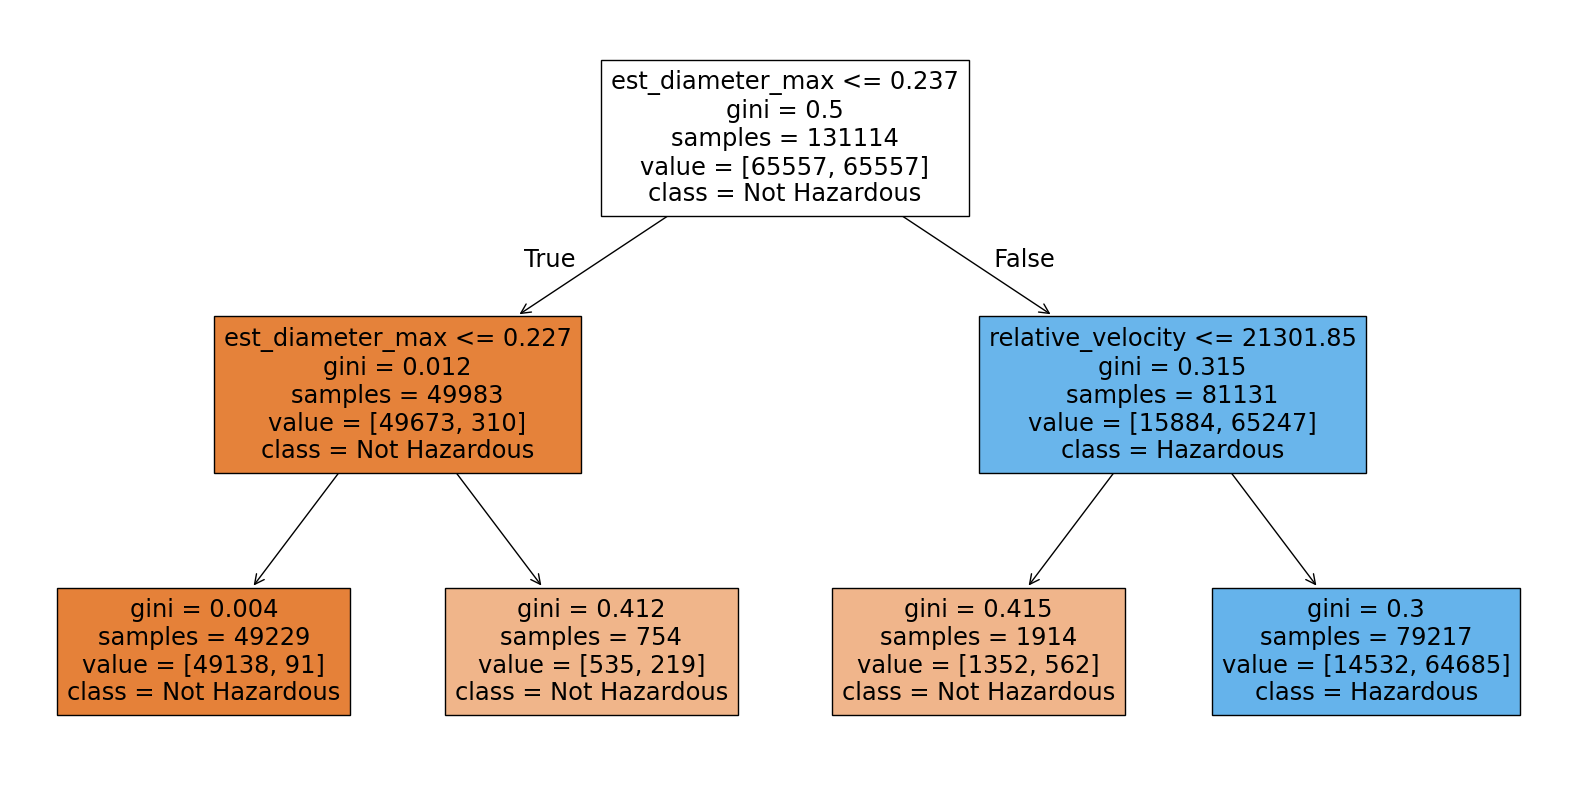

In [100]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X_train_resampled, y_train_resampled)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Hazardous', 'Hazardous'])

# Conclusion

It seems like the most important factor is that, if the asteroid's maximum diameter is larger than 237 meters, it is more likely to be dangerous. It is also most likely hazardous if its velocity is higher than 21300 km/h.

Other than that, only things like the miss distance can further increase the F1 score, however, with a larger tree depth we also decrease our recall, which is the most important thing for this project, since we would rather overestimate an asteroid's hazardousness than classify one as not when in reality it is. 

![eval drawio](eval.drawio.png)